# Project_03 - Engineering Design of rocket flights

![Initial condition of firework with FBD and sum of momentum](../images/firework.png)

You are going to end this module with a __bang__ by looking at the
flight path of a firework. Shown above is the initial condition of a
firework, the _Freedom Flyer_ in (a), its final height where it
detonates in (b), the applied forces in the __Free Body Diagram (FBD)__
in (c), and the __momentum__ of the firework $m\mathbf{v}$ and the
propellent $dm \mathbf{u}$ in (d). 

The resulting equation of motion is that the acceleration is
proportional to the speed of the propellent and the mass rate change
$\frac{dm}{dt}$ as such

$$\begin{equation}
m\frac{dv}{dt} = u\frac{dm}{dt} -mg - cv^2.~~~~~~~~(1)
\end{equation}$$

If you assume that the acceleration and the propellent momentum are much
greater than the forces of gravity and drag, then the equation is
simplified to the conservation of momentum. A further simplification is
that the speed of the propellant is constant, $u=constant$, then the
equation can be integrated to obtain an analytical rocket equation
solution of [Tsiolkovsky](https://www.math24.net/rocket-motion/) [1,2], 

$$\begin{equation}
m\frac{dv}{dt} = u\frac{dm}{dt}~~~~~(2.a)
\end{equation}$$

$$\begin{equation}
\frac{m_{f}}{m_{0}}=e^{-\Delta v / u},~~~~~(2.b) 
\end{equation}$$

where $m_f$ and $m_0$ are the mass at beginning and end of flight, $u$
is the speed of the propellent, and $\Delta v=v_{final}-v_{initial}$ is
the change in speed of the rocket from beginning to end of flight.
Equation 2.b only relates the final velocity to the change in mass and
propellent speed. When you integrate Eqn 2.a, you will have to compare
the velocity as a function of mass loss. 

Your first objective is to integrate a numerical model that converges to
equation (2.b), the Tsiolkovsky equation. Next, you will add drag and
gravity and compare the results _between equations (1) and (2)_.
Finally, you will vary the mass change rate to achieve the desired
detonation height.

__1.__ Create a `simplerocket` function that returns the velocity, $v$,
the acceleration, $a$, and the mass rate change $\frac{dm}{dt}$, as a
function of the $state = [position,~velocity,~mass] = [y,~v,~m]$ using
eqn (2.a). Where the mass rate change $\frac{dm}{dt}$ and the propellent
speed $u$ are constants. The average velocity of gun powder propellent
used in firework rockets is $u=250$ m/s [3,4]. 

$\frac{d~state}{dt} = f(state)$

$\left[\begin{array}{c} v\\a\\ \frac{dm}{dt} \end{array}\right] = \left[\begin{array}{c} v\\ \frac{u}{m}\frac{dm}{dt} \\ \frac{dm}{dt} \end{array}\right]$

Use [an integration method](../module_03/03_Get_Oscillations) to
integrate the `simplerocket` function. Demonstrate that your solution
converges to equation (2.b) the Tsiolkovsky equation. Use an initial
state of y=0 m, v=0 m/s, and m=0.25 kg. 

Integrate the function until mass, $m_{f}=0.05~kg$, using a mass rate change of $\frac{dm}{dt}=0.05$ kg/s. 

> __Hint__: your integrated solution will have a current mass that you can
> use to create $\frac{m_{f}}{m_{0}}$ by dividing state[2]/(initial mass),
> then your plot of velocity(t) vs mass(t)/mass(0) should match
> Tsiolkovsky's
> 
> $\log\left(\frac{m_{f}}{m_{0}}\right) =
> \log\left(\frac{state[2]}{0.25~kg}\right) 
> = \frac{state[1]}{250~m/s} = \frac{-\Delta v+error}{u}$ 
> where $error$ is the difference between your integrated state variable
> and the Tsiolkovsky analytical value.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
def simplerocket(state,dmdt=0.05, u=250):
    '''Computes the right-hand side of the differential equation
    for the acceleration of a rocket, without drag or gravity, in SI units.
    
    Arguments
    ----------    
    state : array of three dependent variables [y v m]^T
    dmdt : mass rate change of rocket in kilograms/s default set to 0.05 kg/s
    u    : speed of propellent expelled (default is 250 m/s)
    
    Returns
    -------
    derivs: array of three derivatives [v u/m*dmdt -dmdt]^T
    '''
    
    #dstate = np.zeros(np.shape(state))
    # your work
    dstate = np.array([state[1], (u/state[2])*dmdt, -dmdt])
    return dstate

I will use the second order convergence of the modified euler integration method (ie Runge-Kutta)

In [3]:
#From the lecture readings
def rk2_step(state, rhs, dt):
    '''Update a state to the next time increment using 
    modified Euler's method.
    
    Arguments
    ---------
    state : array of dependent variables
    rhs   : function that computes the RHS of the DiffEq
    dt    : float, time increment
    
    Returns
    -------
    next_state : array, updated after one time increment'''
    
    mid_state = state + rhs(state) * dt*0.5    
    next_state = state + rhs(mid_state)*dt
 
    return next_state

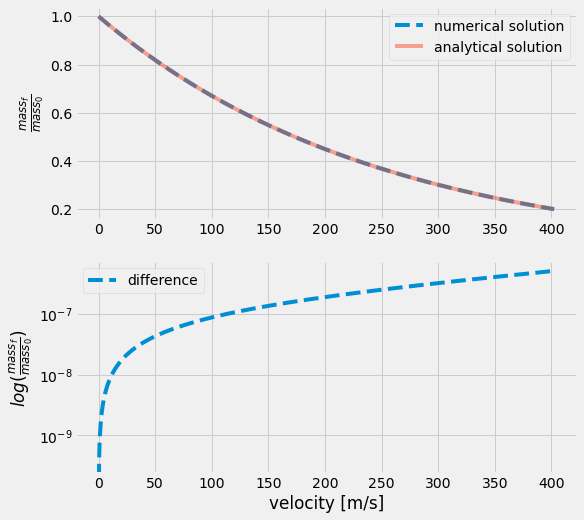

In [4]:
N = 500
m0=0.25
mf=0.05
dm=0.05
t = np.linspace(0,(m0-mf)/dm,N)
dt=t[1]-t[0]

y0 = 0
v0 = 0
m0 = 0.25
u = 250 

#Initialize
simple_sol = np.zeros([N,3])

#Initial Conditions
simple_sol[0,0] = y0
simple_sol[0,1] = v0
simple_sol[0,2] = m0

#perform integration
for i in range(N-1):
        simple_sol[i+1] = rk2_step(simple_sol[i], simplerocket, dt)


delv = simple_sol[:,1] - simple_sol[0,1]
error = np.exp(-delv/u) - (simple_sol[:,2]/m0)

fig = plt.figure(figsize=(8,8))
plt.subplot(211)
plt.plot(simple_sol[:,1], simple_sol[:,2]/simple_sol[0,2], '--', 
         label='numerical solution')
plt.plot(simple_sol[:,1], np.exp(-delv / u), 
         alpha=0.5, label='analytical solution')
plt.ylabel(r'$\frac{mass_f}{mass_0}$')
plt.legend()

plt.subplot(212)
plt.semilogy(simple_sol[:,1], error, '--', label = 'difference')
plt.xlabel('velocity [m/s]')
plt.ylabel(r'$log(\frac{mass_f}{mass_0})$')
plt.legend()
plt.show()

As you can see from the two plots above, the Tsiolkovsky equation seems like it converges with the analytical solution and the error remains very small, therefore its fair to say that the integration converges.

__2.__ You should have a converged solution for integrating `simplerocket`. Now, create a more relastic function, `rocket` that incorporates gravity and drag and returns the velocity, $v$, the acceleration, $a$, and the mass rate change $\frac{dm}{dt}$, as a function of the $state = [position,~velocity,~mass] = [y,~v,~m]$ using eqn (1). Where the mass rate change $\frac{dm}{dt}$ and the propellent speed $u$ are constants. The average velocity of gun powder propellent used in firework rockets is $u=250$ m/s [3,4]. 

$\frac{d~state}{dt} = f(state)$

$\left[\begin{array}{c} v\\a\\ \frac{dm}{dt} \end{array}\right] = 
\left[\begin{array}{c} v\\ \frac{u}{m}\frac{dm}{dt}-g-\frac{c}{m}v^2 \\ \frac{dm}{dt} \end{array}\right]$

Use [two integration methods](../notebooks/03_Get_Oscillations.ipynb) to integrate the `rocket` function, one explicit method and one implicit method. Demonstrate that the solutions converge to equation (2.b) the Tsiolkovsky equation. Use an initial state of y=0 m, v=0 m/s, and m=0.25 kg. 

Integrate the function until mass, $m_{f}=0.05~kg$, using a mass rate change of $\frac{dm}{dt}=0.05$ kg/s, . 

Compare solutions between the `simplerocket` and `rocket` integration, what is the height reached when the mass reaches $m_{f} = 0.05~kg?$

In [5]:
def rocket(state,dmdt=0.05, u=250,c=0.18e-3):
    '''Computes the right-hand side of the differential equation
    for the acceleration of a rocket, with drag, in SI units.
    
    Arguments
    ----------    
    state : array of three dependent variables [y v m]^T
    dmdt : mass rate change of rocket in kilograms/s default set to 0.05 kg/s
    u    : speed of propellent expelled (default is 250 m/s)
    c : drag constant for a rocket set to 0.18e-3 kg/m
    Returns
    -------
    derivs: array of three derivatives [v (u/m*dmdt-g-c/mv^2) -dmdt]^T
    '''
    g=9.81
    #dstate = np.zeros(np.shape(state))
    # your work
    dstate = np.array([state[1], 
                       (u/state[2])*dmdt - g - (c/state[2])*(state[1]**2), 
                       -dmdt])
    
    return dstate

I will use the **modified euler exlicit integration** method and then the **Heun's implicit integration** method to see how they compare.

In [6]:
#From the lecture readings
def heun_step(state,rhs,dt,etol=0.000001,maxiters = 100):
    '''Update a state to the next time increment using the 
    implicit Heun's method.
    
    Arguments
    ---------
    state : array of dependent variables
    rhs   : function that computes the RHS of the DiffEq
    dt    : float, time increment
    etol  : tolerance in error for each time step corrector
    maxiters: maximum number of iterations each time step can take
    
    Returns
    -------
    next_state : array, updated after one time increment'''
    e=1
    eps=np.finfo('float64').eps
    next_state = state + rhs(state)*dt
    ################### New iterative correction #########################
    for n in range(0,maxiters):
        next_state_old = next_state
        next_state = state + (rhs(state)+rhs(next_state))/2*dt
        e=np.sum(np.abs(next_state-next_state_old)/np.abs(next_state+eps))
        if e<etol:
            break
    ############### end of iterative correction #########################
    return next_state

def get_error(num_sol, u=250):
    
    error = np.zeros(len(num_sol[0]))
    for i in range(len(num_sol[0])):
        delv = num_sol[i][-1,1] - num_sol[i][0,1]
        x_an = np.exp(-delv / u) # analytical solution at final time
    
        error[i] =  np.abs(num_sol[i][-1,2] - x_an)
    
    return error

227.5244999341575
227.52443307971967


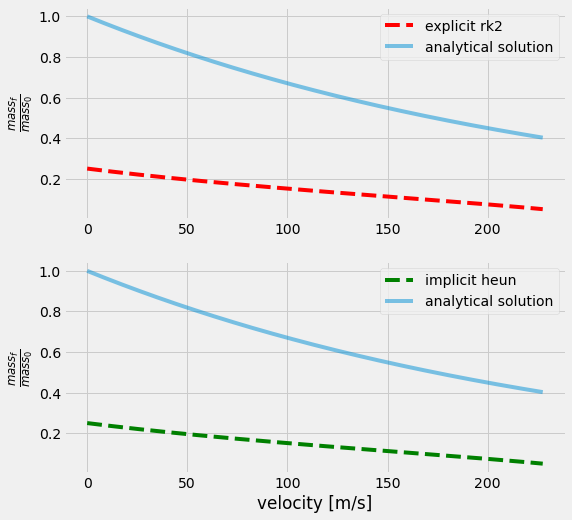

In [7]:
def integration(tstep=1):
    
    N=500
    m0=0.25
    mf=0.05
    dm=0.05
    t = np.linspace(0,(m0-mf)/dm,N)
    dt=t[1]-t[0]
    dt=dt/tstep

    y0 = 0
    v0 = 0
    m0 = 0.25
    u = 250 

    #Initialize
    explicit_rk2 = np.zeros([N,3])
    implicit_heun = np.zeros([N,3])

    #Initial Conditions
    explicit_rk2[0,0] = y0
    explicit_rk2[0,1] = v0
    explicit_rk2[0,2] = m0

    implicit_heun[0,0] = y0
    implicit_heun[0,1] = v0
    implicit_heun[0,2] = m0

    #perform integration
    for i in range(N-1):
        next_rk2 = rk2_step(explicit_rk2[i], rocket, dt)
        next_heun = heun_step(implicit_heun[i], rocket, dt)

        # Stop if mass has reached or dropped below 0.05 kg
        if next_rk2[2] <= 0.05 or next_heun[2] <= 0.05:
            explicit_rk2[i+1] = next_rk2
            implicit_heun[i+1] = next_heun
            break

        explicit_rk2[i+1] = next_rk2
        implicit_heun[i+1] = next_heun

    
    return np.array([explicit_rk2, implicit_heun])
##############################################################################

explicit_rk2 = integration()[0]
implicit_heun = integration()[1]
print(explicit_rk2[-1,1])
print(implicit_heun[-1,1])

delv_e = explicit_rk2[:,1] - explicit_rk2[0,1]
delv_i = implicit_heun[:,1] - implicit_heun[0,1]        

fig = plt.figure(figsize=(8,8))
plt.subplot(211)
plt.plot(explicit_rk2[:,1], explicit_rk2[:,2], 'r--', 
         label='explicit rk2')
plt.plot(explicit_rk2[:,1], np.exp(-delv_e / 250), 
         alpha=0.5, label='analytical solution')

plt.ylabel(r'$\frac{mass_f}{mass_0}$')
plt.legend()

plt.subplot(212)
plt.plot(implicit_heun[:,1], implicit_heun[:,2], 'g--', 
         label='implicit heun')
plt.plot(implicit_heun[:,1], np.exp(-delv_i / 250), 
         alpha=0.5, label='analytical solution')

plt.xlabel('velocity [m/s]')
plt.ylabel(r'$\frac{mass_f}{mass_0}$')
plt.legend()
plt.show()

In [8]:
#extract final velocities and compare to the Tsiolkovsky equation
tstep = [1,2,3,4,5,6,7,8,9,10]
final_v_e = np.zeros([len(tstep)])
final_v_i = np.zeros([len(tstep)])

for i in range(len(tstep)):
    e_rk2 = integration(tstep[i])[0]
    i_heun = integration(tstep[i])[1]
    final_v_e[i] = e_rk2[-1,1]
    final_v_i[i] = i_heun[-1,1]

print(final_v_e)
print(final_v_i)

#Tsiolkovsky equation: delv = u log(mf/m0)
u = 250
m0 = 0.25
mf = 0.05
delta_v = u * np.log(m0 / mf)
print(delta_v)
# ≈ 402.36 m/s

[227.52449993 101.59198702  62.97826573  45.42458783  35.47795729
  29.09047228  24.64638932  21.3775718   18.87296238  16.89294765]
[227.52443308 101.59198088  62.97826572  45.42458812  35.47795751
  29.09047244  24.64638943  21.37757188  18.87296244  16.8929477 ]
402.3594781085251


In [9]:
#extract final heights
tstep = [1,2,3,4,5,6,7,8,9,10]
final_h_e = np.zeros([len(tstep)])
final_h_i = np.zeros([len(tstep)])

for i in range(len(tstep)):
    e_rk2 = integration(tstep[i])[0]
    i_heun = integration(tstep[i])[1]
    final_h_e[i] = e_rk2[-1,0]
    final_h_i[i] = i_heun[-1,0]

print(final_h_e)
print(final_h_i)

[425.44318011  94.46534557  39.85641308  21.82304915  13.74012607
   9.43772233   6.87960459   5.2362186    4.11830109   3.32358096]
[425.44323754  94.46542924  39.85643914  21.82306009  13.74013162
   9.43772551   6.87960657   5.23621993   4.11830201   3.32358164]


**I cannot figure out why the integration does not converge as the time step decreases. I kept on workshopping with the learning coach but I kept on getting magnitudes lower than what the Tsiolkovsky equation predicts for the final velocity as I decrease the timestep. This is very frustrating but I need to move on to the next problem...**

__3.__ Solve for the mass change rate that results in detonation at a height of 300 meters. Create a function `f_dm` that returns the final height of the firework when it reaches $m_{f}=0.05~kg$. The inputs should be 

$f_{m}= f_{m}(\frac{dm}{dt},~parameters)$

where $\frac{dm}{dt}$ is the variable you are using to find a root and $parameters$ are the known values, `m0=0.25, c=0.18e-3, u=250`. When $f_{m}(\frac{dm}{dt}) = 0$, you have found the correct root. 

Plot the height as a function of time and use a star to denote detonation at the correct height with a `'*'`-marker

Approach the solution in two steps, use the incremental search
[`incsearch`](../module_03/04_Getting_to_the_root) with 5-10
sub-intervals _limit the number of times you call the
function_. Then, use the modified secant method to find the true root of
the function.

a. Use the incremental search to find the two closest mass change rates within the interval $\frac{dm}{dt}=0.05-0.4~kg/s.$

b. Use the modified secant method to find the root of the function $f_{m}$.

c. Plot your solution for the height as a function of time and indicate the detonation with a `*`-marker.

In [10]:
#From Lecture Readings########################################################

def incsearch(func,xmin,xmax,ns=50):
    '''incsearch: incremental search root locator
    xb = incsearch(func,xmin,xmax,ns):
      finds brackets of x that contain sign changes
      of a function on an interval
    arguments:
    ---------
    func = name of function
    xmin, xmax = endpoints of interval
    ns = number of subintervals (default = 50)
    returns:
    ---------
    xb(k,1) is the lower bound of the kth sign change
    xb(k,2) is the upper bound of the kth sign change
    If no brackets found, xb = [].'''
    x = np.linspace(xmin,xmax,ns)
    f = func(x)
    sign_f = np.sign(f)
    delta_sign_f = sign_f[1:]-sign_f[0:-1]
    i_zeros = np.nonzero(delta_sign_f!=0)
    nb = len(i_zeros[0])
    xb = np.block([[ x[i_zeros[0]+1]],[x[i_zeros[0]] ]] )

    
    if nb==0:
        print('no brackets found\n')
        print('check interval or increase ns\n')
    else:
        print('number of brackets:  {}\n'.format(nb))
    return xb

##############################################################################

def f_dm(dmdt, m0 = 0.25, c = 0.18e-3, u = 250):
    ''' define a function f_dm(dmdt) that returns 
    height_desired-height_predicted[-1]
    here, the time span is based upon the value of dmdt
    
    arguments:
    ---------
    dmdt: the unknown mass change rate
    m0: the known initial mass
    c: the known drag in kg/m
    u: the known speed of the propellent
    
    returns:
    --------
    error: the difference between height_desired and height_predicted[-1]
        when f_dm(dmdt) = 0, the correct mass change rate was chosen
    '''
    # your work
    height_predicted = 300
    dmdt = incsearch(rocket, 0.05, 0.4, ns=5)
    
    
    return error

In [11]:
def mod_secant(func,dx,x0,es=0.0001,maxit=50):
    '''mod_secant: Modified secant root location zeroes
    root,[fx,ea,iter]=mod_secant(func,dfunc,xr,es,maxit,p1,p2,...):
    uses modified secant method to find the root of func
    arguments:
    ----------
    func = name of function
    dx = perturbation fraction
    xr = initial guess
    es = desired relative error (default = 0.0001 )
    maxit = maximum allowable iterations (default = 50)
    p1,p2,... = additional parameters used by function
    returns:
    --------
    root = real root
    fx = func evaluated at root
    ea = approximate relative error ( )
    iter = number of iterations'''

    iter = 0;
    xr=x0
    for iter in range(0,maxit):
        xrold = xr;
        dfunc=(func(xr+dx)-func(xr))/dx;
        xr = xr - func(xr)/dfunc;
        if xr != 0:
            ea = abs((xr - xrold)/xr) * 100;
        else:
            ea = abs((xr - xrold)/1) * 100;
        if ea <= es:
            break
    return xr,[func(xr),ea,iter]

## References

1. Math 24 _Rocket Motion_. <https://www.math24.net/rocket-motion/\>

2. Kasdin and Paley. _Engineering Dynamics_. [ch 6-Linear Momentum of a Multiparticle System pp234-235](https://www.jstor.org/stable/j.ctvcm4ggj.9) Princeton University Press 

3. <https://en.wikipedia.org/wiki/Specific_impulse>

4. <https://www.apogeerockets.com/Rocket_Motors/Estes_Motors/13mm_Motors/Estes_13mm_1_4A3-3T>